In [1]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\vedan\\OneDrive\\Documents\\Regex\\Python\\\ML\\\CSV Files\\newplacementdata.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\vedan\AppData\Local\Temp\ipykernel_39892\110564673.py:1: SyntaxWarning: invalid escape sequence '\M'
  df = pd.read_csv("C:\\Users\\vedan\\OneDrive\\Documents\\Regex\\Python\\\ML\\\CSV Files\\newplacementdata.csv")


,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

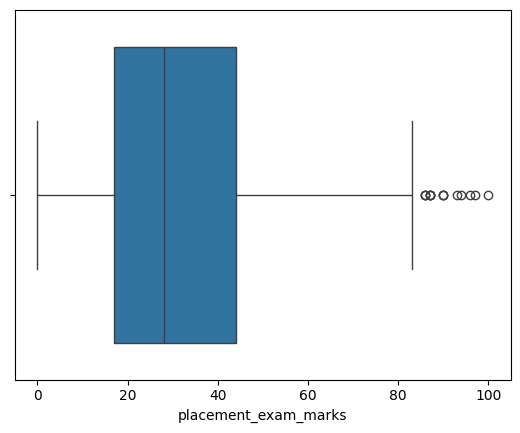

In [6]:
sns.boxplot(x = df['placement_exam_marks'])

In [7]:
## Finding the IQR

percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [8]:
percentile25

17.0

In [9]:
percentile75

44.0

In [10]:
IQR = percentile75 - percentile25
IQR

27.0

In [11]:
upper_fence = percentile75 + 1.5 * (IQR)
lower_fence = percentile25 - 1.5 * (IQR)
print("Upper Limit: ", upper_fence)
print("Lower Limit: ", lower_fence)

Upper Limit:  84.5
Lower Limit:  -23.5


In [12]:
df[df['placement_exam_marks'] > upper_fence]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [13]:
df[df['placement_exam_marks'] < lower_fence]

,cgpa,placement_exam_marks,placed


In [14]:
## Trimming ---> Outlier Removing Technique
new_df = df[df['placement_exam_marks'] < upper_fence]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


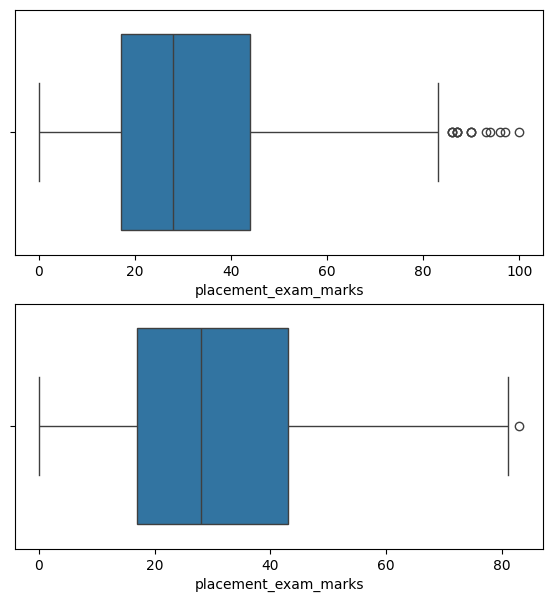

In [15]:
## Comparison
plt.figure(figsize= (15,7))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = new_df['placement_exam_marks'])

plt.show()

In [16]:
## Capping (Outlier Removing Technique)
new_df_cap = df.copy()

In [17]:
new_df_cap['placement_exam_marks'] = np.where(

    new_df_cap['placement_exam_marks'] > upper_fence, 
    upper_fence,

    np.where(
        new_df_cap['placement_exam_marks'] < lower_fence, 
        lower_fence, new_df_cap['placement_exam_marks'])
        
)

In [18]:
## Same Functionality as above
new_df_cap['placement_exam_marks'] = new_df_cap['placement_exam_marks'].clip(lower_fence, upper_fence)

In [19]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


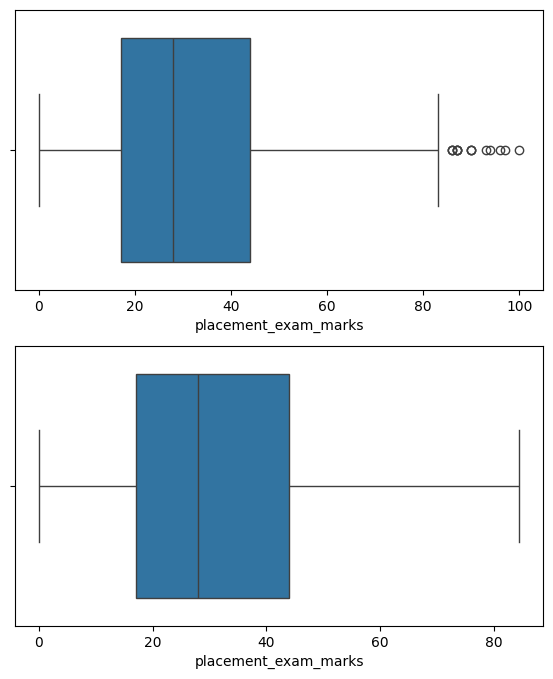

In [20]:
## Comparison
plt.figure(figsize= (15,8))

plt.subplot(222)
sns.boxplot(x = df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x = new_df_cap['placement_exam_marks'])

plt.show()